In [ ]:
# Si estámos usando Google Colab, debemos subir el archivo con:
from google.colab import files
uploaded = files.upload()

Saving resultados.csv to resultados.csv


In [ ]:
# Leer el archivo csv, despues de la cabecera y las columnas que vamos a utilizar
import numpy as np
dataset = np.loadtxt('resultados.csv', delimiter=' ', skiprows=1, usecols=(2,3,4,5))

#para visualizar los datos como el archivo
# np.set_printoptions(suppress=True, precision=16)

# Valores de entrada (time, risk, arrival)
X = dataset[:, 0:3]

#Valores de salida (arousal)
Y = dataset[:, 3]


In [ ]:
# Imprimir forma
print("X:", X.shape)
# print("Forma de X:\n", X)
print("Y:", Y.shape)
# print("Forma de Y:\n", Y)


X: (144, 3)
Y: (144,)


In [ ]:
# Dividir en entrenamiento y prueba
from sklearn.model_selection import train_test_split

# 80% para entrenamiento, 20% para prueba
# Cada vez que ejecutes el código, los datos de entrenamiento y prueba pueden cambiar, porque la división se hace de forma aleatoria (random_state).
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

datasets = train_test_split(X,
                            Y,
                            test_size=0.3)

X_train, X_test, y_train, y_test = datasets


In [ ]:
# Imprime los numero para entrenar

#print("Entrada de entrenamiento:\n", X_train)
print("Salida de entrenamiento:\n", y_train)

# print("Entrada de prueba:\n", X_test)
# print("Salida de prueba:\n", y_test)


Salida de entrenamiento:
 [100.   0.   0. 100.   0.   0.  75.   0.   0.  75. 100. 100.  25.  75.
   0. 100.   0.  75.   0.  25. 100.   0.   0.  50.  25. 100. 100.  25.
 100. 100.   0. 100. 100.   0.  25. 100.  25.  75.  75.   0.  25.   0.
  25.  25. 100.  25.   0.  25.   0.   0. 100. 100.   0.  75. 100. 100.
 100.   0.  25.  25.   0.   0.   0.  75.  25.  25.  75. 100. 100. 100.
  75.  50.  75.  25.  25. 100.  25. 100. 100.  25.  75.   0.   0.   0.
 100.  75.   0. 100.   0.  25.  25.   0.  75. 100.  25.   0.   0.   0.
 100.   0.]


In [ ]:
# Crear el Perceptrón multicapa.
# Importar la clase del perceptrón multicapa
from sklearn.neural_network import MLPRegressor

# mlp = MLPRegressor(hidden_layer_sizes=(5,5,5),
#                    solver='adam',
#                    learning_rate='adaptive', max_iter=4000,tol=0.1)

mlp = MLPRegressor(hidden_layer_sizes=(5,5,10),
                   solver='adam',
                   learning_rate='adaptive',
                   max_iter=50000,
                   tol=0.0001)


In [ ]:
#Entrenar la red neuronal para regresión.

# X es una matriz de la forma (ejemplos de entrenamiento, características del punto)
# y es una matriz de la forma (vectores salida, valores de cada salida)

mlp.fit(X_train, y_train)


MLPRegressor(hidden_layer_sizes=(5, 5, 10), learning_rate='adaptive',
             max_iter=50000)

In [ ]:
# Para predecir la clase de varios puntos de entrada

predicted = mlp.predict( X_test )
print(predicted)

print(y_test)


[22.301762685122764  67.86183202734047   68.6468755258486
 55.41086114052338   67.86183202734047   20.52344033509087
 22.301762685122764  49.84409642631498   55.41086114052338
 22.301762685122764  67.86183202734047   62.099956374449675
 55.41086114052338   68.6468755258486    20.52344033509087
 22.301762685122764  67.86183202734047   67.86183202734047
 20.52344033509087   67.86183202734047   64.40210158477294
 22.301762685122764  56.40017753471084   22.301762685122764
 55.41086114052338   22.301762685122764  55.41086114052338
 20.52344033509087   22.301762685122764  62.099956374449675
 67.86183202734047   55.41086114052338   20.52344033509087
 62.099956374449675  71.64619458508051   20.52344033509087
 22.301762685122764  62.099956374449675  -0.4067599772317458
 55.41086114052338   41.093178754620936  20.52344033509087
 20.52344033509087   55.41086114052338  ]
[  0. 100. 100.  25.  75.   0.  50. 100.  25.  25. 100. 100.   0.  25.
   0.  25. 100.   0.   0.  75. 100.   0. 100.  25.  50.  

In [ ]:

input_example = X_test[0].reshape(1, -1)
predicted_output = mlp.predict(input_example)
real_output = y_test[0]

print(f"Entrada para la predicción: {input_example}")
print(f"Predicción de la red neuronal: {predicted_output}")
print(f"Salida real: {real_output}")

# También puedes predecir para todo el conjunto de prueba

# predictions = mlp.predict(X_test)
# print("Predicciones para el conjunto de prueba:\n", predictions)
# print("Salidas reales del conjunto de prueba:\n", y_test)


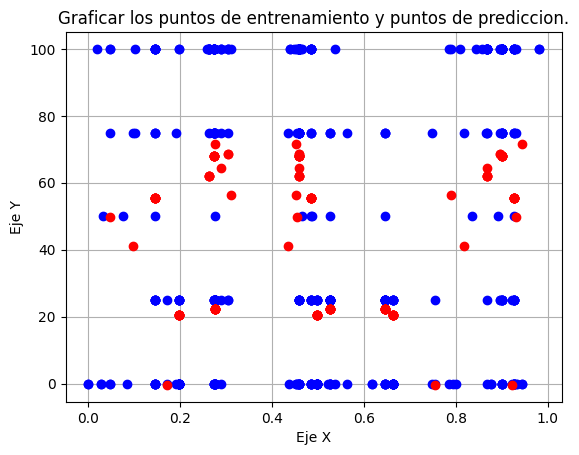

In [ ]:
# Graficar los puntos de entrenamiento y puntos de prediccion.

import matplotlib.pyplot as plt
import matplotlib as mpl


fig, ax = plt.subplots()

ax.plot(X, Y, "bo") # marker='o', linestyle='--', color='r', label='Datos'
ax.plot(X_test, predicted, "ro")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.title("Graficar los puntos de entrenamiento y puntos de prediccion.")
plt.grid(True)

plt.show()
